<H1> Decoding Shor's Algorithm </H1>

Hello, I have been learning qunatum computing and Quantum Information Sciences for a while. And this is my first project in Qiskit. This code is my attempt to not just impliment but also explain the hidden details of Shor's algorithm. 

So, let's get started. First things first, here are the prerequisites:

- You need the following libraries
<code>pip install ipykernel, qiskit, qiskit_aer, matplotlib, pylatexenc </code> 

- you can't import Aer from qiskit (That was older version). You need to go for *qiskit_aer* like this: <code> from qiskit_aer import Aer </code>

- you can't import execute from qiskit (that was also older version). A replacement is *transpile* like this: <code> from qiskit import transpile</code>

    And now instead of using execute like this: <code> job = execute(circuit, backend) </code>

    You should use transpile and run as follows:

    <code>
    new_circuit = transpile(circuit, backend) \
    job = backend.run(new_circuit) 
    </code>

    Assuming you have your backend initialized, e.g.,

    <code> backend = Aer.get_backend('qasm_simulator') </code>

- Other than that, if you know the basics of quantum information Sciences, quantum circuits and basic modular arithmatic, you should be fine.

### What is Shor's Algorithm?

Shor's Algorithm is an algorithm designed to efficiently factor large integers. Now, Shor's algorithm can factor number $N$ usually works when the following conditions are met:
- $N = p \cdot q$ i.e. N must be composite.
- $p$ and $q$ are prime.
- If $N$ is a power of a prime (e.g., $N = p^k$, where $p$ is prime and $k \geq 2$), Shor’s algorithm might fail to find the correct factors efficiently. 
- Shor’s algorithm requires the choice of a random integer $a$ where $1 < a < N$ and $a$ is coprime to $N$ i.e., $\gcd(a, N) = 1$. If $a$ is not coprime to $N$, then the algorithm immediately finds a nontrivial factor of $N$ without needing to proceed further.

If we can meet the following requirements, we can implement shor's algorithm.

### implementing Shor's algorithm Mathematically

For the thing that this algorithm can do, it is pretty simple to impliment. I mean, the process is tedious but not difficult. Here is a step by step process

**Step 1: Choose a Random Integer $a$**
- Choose a random integer $a$ such that $1 < a < N$.
- Check if $\gcd(a, N) = 1$. If $\gcd(a, N) > 1$, then $\gcd(a, N)$ is a non-trivial factor of $N$, and the algorithm terminates.

**Step 2: Find the Period $r$ of the Function $f(x) = a^x \mod N$**
- The goal is to find the smallest integer $r$ such that:
  $$
  a^r \equiv 1 \mod N
  $$
  This is called the "order" or "period" of $a$ modulo $N$.
- Okay, this step might look intimidating but it's pretty simple. Let's say we have some $y \mod N$. In this case, for periodically increasing values of $y$, the numbers will increase, unless the value of y goes beyond N. After that, the values will start to cycle back. So, when dealing with modulus of increasing value, we always get a cycle. Now, how many $y$ values I had to go through to complete the cycle is it's periodicity.
- Our job here is to also find periodicity for $a^x$, where $x$ is increasing. So, for  a given given value of $a$ and a given value of $N$. We will find $a^x \mod N$, where x = 1,2,3,4... If we keep doing this, at some point, the values will start repreating themselves and we will get a cycle. Now, after how many values of $x$, do we get this cycle is called $r$. We have to find $r$. Formally, $  a^r \equiv 1 \mod N$


**Step 3: Check the Parity of $r$**
- If r is even, good news. It r is odd, go back to step 1.

**Step 4: Check for a Non-Trivial Factor**
- If $r$ is even, compute:
  $$
  x = a^{r/2} \mod N
  $$

**Step 5: Check modular equivalency**
- If $a^{r/2} \not\equiv -1 \mod N$, good news, otherwise go back to step 1

**Step 6: Compute the Factors**
- If $a^{r/2} \not\equiv -1 \mod N$, compute the following two values:
  $$
  \text{Factor 1} = \gcd(a^{r/2} - 1, N)
  $$
  $$
  \text{Factor 2} = \gcd(a^{r/2} + 1, N)
  $$
- One of these values will be a non-trivial factor of $N$. If neither of these values are factors, go back to step 1.

And that's it. That's Shor's algorithm. Pretty simple right.

### So, What's the fuss???

If the algorithm is so simple, why can't classical computers do it well.

Well, classical computers can do it. It's just that, it takes them a lot of time, to do it. Exponential time. 

Let me show you, I will do shor's algorithm on number $15 = 5 \cdot 3$ using classical computing. Since, 15 is a small number, they can do it easily.

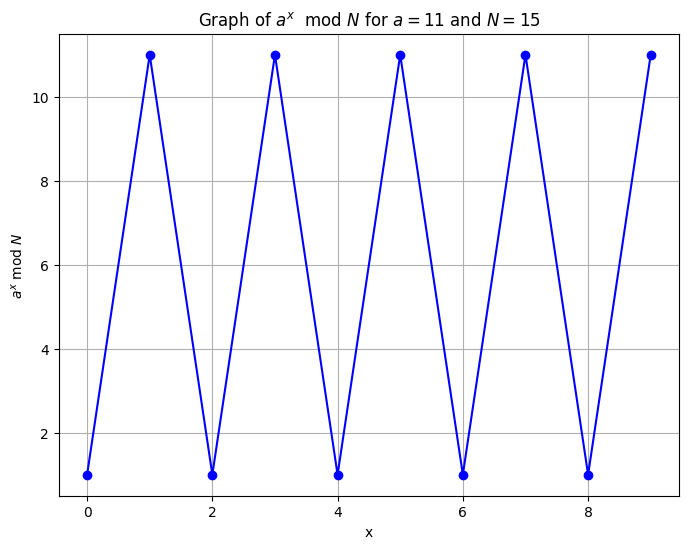

The order of 11 modulo 15 is: 2
Non-trivial factor of N is: 5
Non-trivial factor of N is: 3


In [12]:
import matplotlib.pyplot as plt

# Function to calculate the greatest common divisor (GCD)
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

# Function to find the order of 'a' modulo 'N'
def order(a, N):
    r = 1
    while pow(a, r, N) != 1:
        r += 1

    # Plotting a^x mod N for x = 0 to r (showing periodicity for further explanation)
    x_vals = list(range(5*r)) 
    y_vals = [pow(a, x, N) for x in x_vals]
    
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='b')
    plt.title(f"Graph of $a^x$  mod $N$ for $a={a}$ and $N={N}$")
    plt.xlabel('x')
    plt.ylabel(f'$a^x$ mod $N$')
    plt.grid(True)
    plt.show()

    return r

# Parameters
N = 15
a = 11

# Step 1: Check if gcd(a, N) = 1 (to ensure that a is coprime with N)
if gcd(a, N) != 1:
    print(f"a = {a} is not coprime with N = {N}, choose another a.")
else:
    # Step 2: Find the order 'r' of 'a' modulo 'N'
    r = order(a, N)
    print(f"The order of {a} modulo {N} is: {r}")
    
    # Step 3: If r is even and a^(r/2) != -1 (mod N), factor N
    if r % 2 == 0:
        factor1 = gcd(pow(a, r//2) - 1, N)
        factor2 = gcd(pow(a, r//2) + 1, N)
        
        if factor1 != 1 and factor1 != N:
            print(f"Non-trivial factor of N is: {factor1}")
        if factor2 != 1 and factor2 != N:
            print(f"Non-trivial factor of N is: {factor2}")


As we can see, the code works perfectly, above is a graph of $ a^x mod N$ and we can see that it is periodic with periodicity of 2. Since, r = 2, r is even, we can proceed to the rest of the algorithm and we are done. 

So, why do classical computers fail at larger numbers?
In classical methods, finding this order requires checking successive powers of $a$ modulo $N$ and comparing them to 1. Specifically, the classical algorithm attempts to find $r$ by computing:

$$
a^1, a^2, a^3, \dots, a^r \ (\text{mod} \ N)
$$

This process is done sequentially, which becomes computationally expensive when $N$ is large. The challenge lies in the fact that the order $r$ can be large and the number of operations grows rapidly as $N$ increases. The classical method for finding the order relies on brute force, which is **exponential** in nature for large numbers. This means that as $N$ gets larger, the time it takes to find the order grows exponentially. For example:

- For $N = 15$, finding $r$ is manageable.
- But for a larger number like $N = 143$, which is the product of primes 11 and 13, finding $r$ requires more steps.
- For much larger numbers, such as those used in RSA encryption (hundreds or thousands of digits), this process becomes infeasible.

### What's so quantum about it?

Quantum computing can solve the order finding problem in Shor's algorithm much more efficiently than classical computers by exploiting quantum properties like **superposition** and **quantum parallelism**. Instead of computing powers of $a \mod N$ one by one, quantum computers can compute multiple values of $a^x \mod \ N$ in parallel. This parallel computation provides a significant speedup over the classical method, which has to evaluate each power one at a time.

### So, what kind of code can I write that can compute this cycle?

Well, turns out you don't have to do anything. There is an algorithm called quantum phase estimation (QPE) algorithm, which can find the eigenvalue of a matrix given it's eigenvector. This algorithm, in a genius stroke of luck, kind off does the exact same thing as finding this cycle. So, we need to understand this algorithm to compute Shor's algorithm

However, QPE algorithm includes the use of another algorithm called Quantum Forueir Transform. So, before we even try to understand quantum pahse estimation. First let's undertand quantum Fourier Transform

### Quantum Fourier Transform (QFT)

The **Quantum Fourier Transform (QFT)** is a quantum analogue of the classical Fourier transform. The QFT is a linear transformation that maps a quantum state to its frequency components, allowing quantum computers to identify periodic patterns in a set of data. Basically, it is a change of basis algorithm. Just like classical Fourier tranform can change basis from x-space to k-space, the quantum Fourier Transform can change basis from $\ket{0}$ and $\ket{1}$ to $\ket{+}$ and $\ket{-}$. So, it is not wrgont to say that it is nothing more than a glorified Hadamard gate. But unlike Hadamard gate, which only works on a single cubit, this algorithm can work on muliple qubits simulatenously. 

   
3. **Mathematical Formulation:**
   - If you have a quantum register with $n$ qubits, the QFT is defined as a unitary operation that maps the state $\ket{x}$ to a superposition of basis states:
   
     $$
     \ket{x} = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \omega^{xk} \ket{k}
     $$
   
     where $\omega = e^{2\pi i / N}$ is the primitive N-th root of unity, and $N = 2^n$ for a quantum register of $n$ qubits.
     
4. **Steps of the QFT:**
   - The QFT on $n$ qubits consists of the following steps:
     1. Apply a **Hadamard gate** on the first qubit.
     2. Apply **controlled-phase gates** on subsequent qubits. Each controlled-phase gate introduces a phase shift based on the position of the qubits.
     3. Swap qubits to reverse the order of the qubits, so the final state corresponds to the correct frequencies.
   
5. **Inverse QFT:**
   - The **Inverse QFT (IQFT)** is simply the reverse operation of the QFT. It is used to decode information from the quantum state and can be performed by reversing the steps of the QFT (applying inverse Hadamard gates, reversing the order of qubits, and applying inverse controlled-phase gates).

We can notice, that for a single qubit, QFT is just a hadamard gate.

Now, why this algorithm works the way it does? That is a lengthy answer, so I am not inclined to provide it here. But if you are curious, here is a resource to check out:
https://www.youtube.com/watch?v=4nT0BTUxhJY

Now, lets impement QFT in a circuit to see how it goes

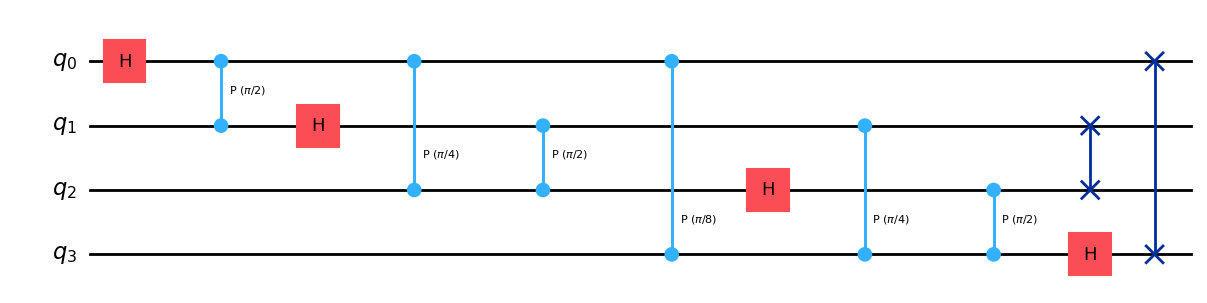

In [13]:
from qiskit import QuantumCircuit
import numpy as np

# Function to create the QFT gate, where n is the number of qubits
def qft(n):
    qft = QuantumCircuit(n)
    for j in range(n):
        for m in range(j):
            qft.cp(np.pi / float(2**(j - m)), m, j)
        qft.h(j)
    for i in range(n // 2):
        qft.swap(i, n - i - 1)
    return qft

# Create a QFT circuit for visualization
qft_circuit = qft(4)
qft_circuit.draw('mpl')

### Quantum Phase Estimation Problem

Quantum Phase Estimation (QPE) is a quantum algorithm used to estimate the eigenvalue (phase) associated with an eigenvector of a unitary operator. It is a fundamental problem in quantum computing and has applications in various quantum algorithms, including Shor's Algorithm for factoring large integers.

#### Problem Definition:
Given a unitary operator $U$ and its eigenstate $| \psi \rangle$ such that:

$$
U | \psi \rangle = e^{2 \pi i \theta} | \psi \rangle
$$

where $\theta$ is a real number (the phase), the goal of the Quantum Phase Estimation problem is to estimate $\theta$ with high precision.

#### Key Steps of QPE:

1. **Prepare the Initial State:**
   Start by preparing a system of two registers:
   - The first register is a set of qubits in the state $| 0 \rangle$. they can bew as much as you want, depending on how precise you would like your answer to be.
   - The second register holds the eigenstate $| \psi \rangle$.

2. **Apply Hadamard Gates:**
   Apply a Hadamard gate on the first register to create a superposition of all possible states.

3. **Apply Controlled-U Operations:**
   Use a series of controlled operations $C^kU$ (where $U$ is the unitary operator and $k$ corresponds to different powers of $U$) on the second register, controlled by the qubits in the first register.

   (At this point you might realize that, our operations on the first register are somewhat similar to QFT but instead of having a controlled-phase gate. We have a controlled U gate. So, basically, now during the basis change, we have added the information of the pahase of eigenvalue of the second register into the first register. Now, if we change our basis back, we can get back the original values and phases)

4. **Quantum Fourier Transform (QFT):**
   After the controlled operations, apply the inverse of Quantum Fourier Transform (QFT) to the first register to extract the phase information.

5. **Measurement:**
   Finally, measure the qubits in the first register to obtain an estimate of the phase $\theta$.


This explanation might not be enough. For more detail, look up: https://www.youtube.com/watch?v=5kcoaanYyZw&list=PLkzEMll7nz0WNdePloNqT0YkGIO7iQrig&index=3&t=2268s

Let's impliement QPE in here:

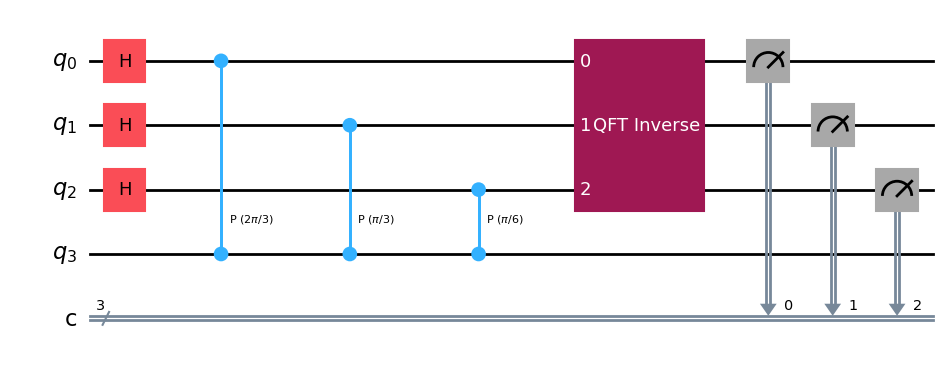

In [14]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np

# Function to create the QFT inverse gate
def qft_inv(n):
    qft_inv = QuantumCircuit(n)
    for j in range(n):
        for m in range(j):
            qft_inv.cp(np.pi / float(2**(j - m)), m, j)
        qft_inv.h(j)
    for i in range(n // 2):
        qft_inv.swap(i, n - i - 1)
        qft_inv.inverse()
    qft_inv.name = "QFT Inverse"
    return qft_inv

# Quantum Phase Estimation (QPE) function
def qpe(theta, n_count=3):
    """ Quantum Phase Estimation to estimate the phase of U (rotation by theta) """
    # Number of qubits for the phase estimation (n_count is the number of qubits in the register)
    qc = QuantumCircuit(n_count + 1, n_count)
    
    # Apply Hadamard gate to the first register qubits
    for q in range(n_count):
        qc.h(q)
    
    # Apply controlled-U operations (directly in the circuit)
    for q in range(n_count):
        qc.cp(2 * np.pi * theta / (2 ** q), q, n_count)  # Controlled rotation Rz(2πθ/(2^q))

    # Apply the inverse Quantum Fourier Transform (QFT†) on the first register
    qc.append(qft_inv(n_count), range(n_count))
    
    # Measure the first register
    qc.measure(range(n_count), range(n_count))
    
    return qc

# Example parameters
theta = 1/3  # Example phase to estimate (e.g., U = Rz(2πθ))
n_count = 3  # Number of qubits for phase estimation

# Generate the QPE circuit
qpe_circuit = qpe(theta, n_count)

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qpe_circuit, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()

# Display the QPE circuit
qpe_circuit.draw('mpl')

Alright, now equipped with all this knowledge. Let's tackle Shor's algorithm.

### Final Boss: Shor's algorithm

The central problem in Shor's algorithm is to find the **period** $r$ of a function defined as:

$$
f(x) = a^x \mod N
$$

Where $a$ is a randomly chosen number that is coprime with $N$. The **period** $r$ is the smallest integer such that:

$$
a^r \equiv 1 \mod N
$$

If we can find the period $r$, then we can use it to find non-trivial factors of $N$. This is where Quantum Phase Estimation (QPE) comes in.

Quantum Phase Estimation is a quantum algorithm that estimates the phase $ \phi $ of an eigenvalue $e^{2\pi i \phi}$ of a unitary operator. In the context of Shor’s algorithm, QPE helps estimate the phase corresponding to the eigenvalue of the operator $U_a = \left| x \right\rangle \to \left| a^x \mod N \right\rangle$, which is a quantum version of the modular exponentiation operation.

#### Steps in QPE for Shor's Algorithm

1. **Superposition**: QPE begins with creating a superposition of quantum states. This is done using Hadamard gates on the qubits that represent the "exponent" in the modular exponentiation.

2. **Apply the Unitary Operator**: Next, a controlled unitary operator $U_a$ is applied, which is essentially modular exponentiation. This operator is controlled by the qubits that represent the phase.

3. **Quantum Fourier Transform (QFT)**: The Inverse of Fourier Transform is applied to the quantum state. This is key because QFT maps the phase information onto the computational basis, making it measurable.

4. **Measurement**: Finally, the quantum state is measured. The measurement gives a value that provides an estimate of the phase, which is related to the period $r$ of the function $a^x \mod N$.


## Let's implement, quantum Shor's algorithm


I will impliment Shor's algorithm for 2 numbers: N = 15, 143. There are a lot of places online where N = 15 has been implimented and shown. So, I will first do that to get all the bugs out. Then, I will implement, my own N = 143.

For N = 15

Step 1: Implement Inverse Quantum Fourier Transform 

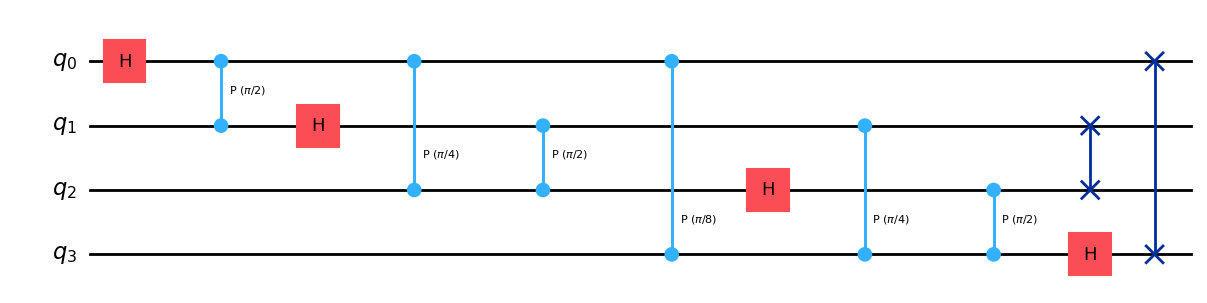

In [15]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np
from fractions import Fraction

# Function to calculate the greatest common divisor (GCD)
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

# Function to create the QFT gate
def qft_inv(n):
    qft_inv = QuantumCircuit(n)
    for j in range(n):
        for m in range(j):
            qft_inv.cp(np.pi / float(2**(j - m)), m, j)
        qft_inv.h(j)
    for i in range(n // 2):
        qft_inv.swap(i, n - i - 1)
        qft_inv.inverse()
    qft_inv.name = "QFT Inverse"
    return qft_inv

# Create a QFT circuit for visualization
qft_inv_circuit = qft_inv(4)
qft_inv_circuit.draw('mpl')

Step 2: Now, I will create a QPE for $N = 15$. 

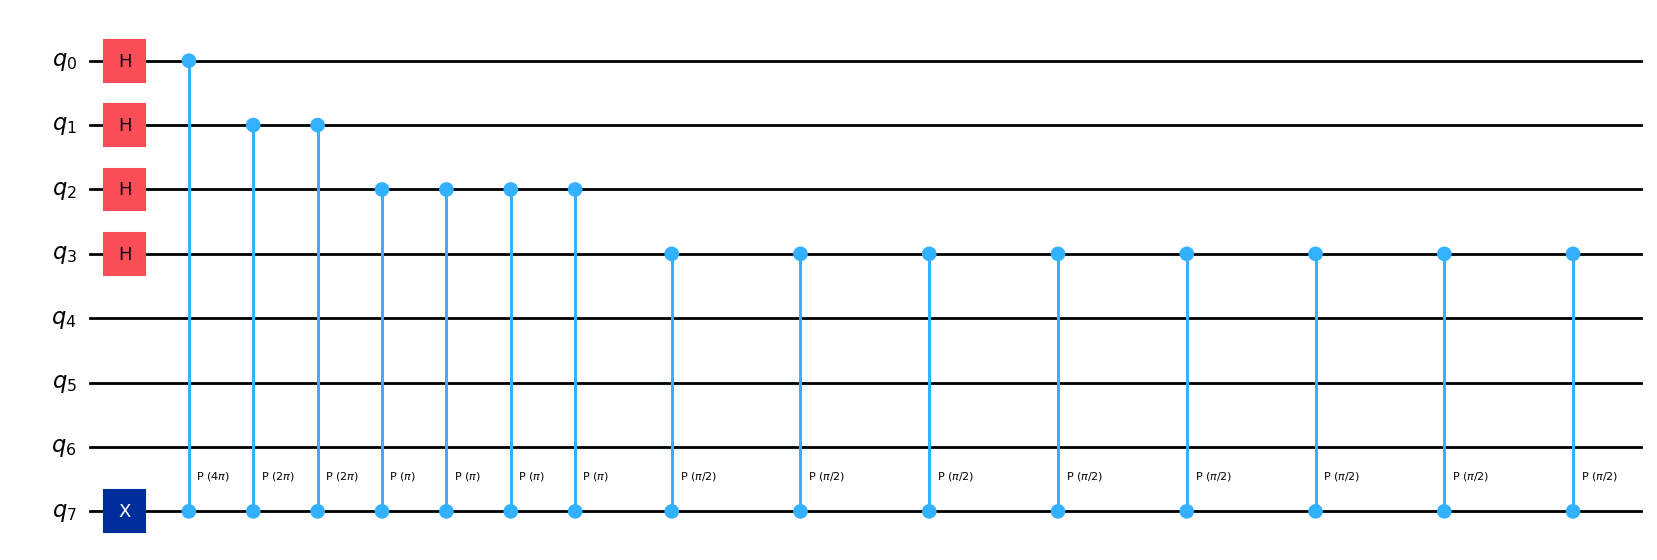

In [16]:
# Function to create QPE circuit as a gate for a specific 'a' without classical bits
def qpe_amod15(a):
    n_count = 4
    amod15 = QuantumCircuit(n_count + 4)

    for q in range(n_count):
        amod15.h(q)

    amod15.x(3 + n_count)

    for pow in range(n_count):
        for _ in range(2**pow):
            amod15.cp(a * np.pi / (2**pow), pow, 3 + n_count)

    amod15.name = f"QPE_amod15_with_a = {a}"
    return amod15

# Create a QPE circuit for visualization
qpe_circuit = qpe_amod15(4)
qpe_circuit.draw('mpl')

Step 3: Now, let's combine the circuit

Non-trivial factors are: [5, 3]


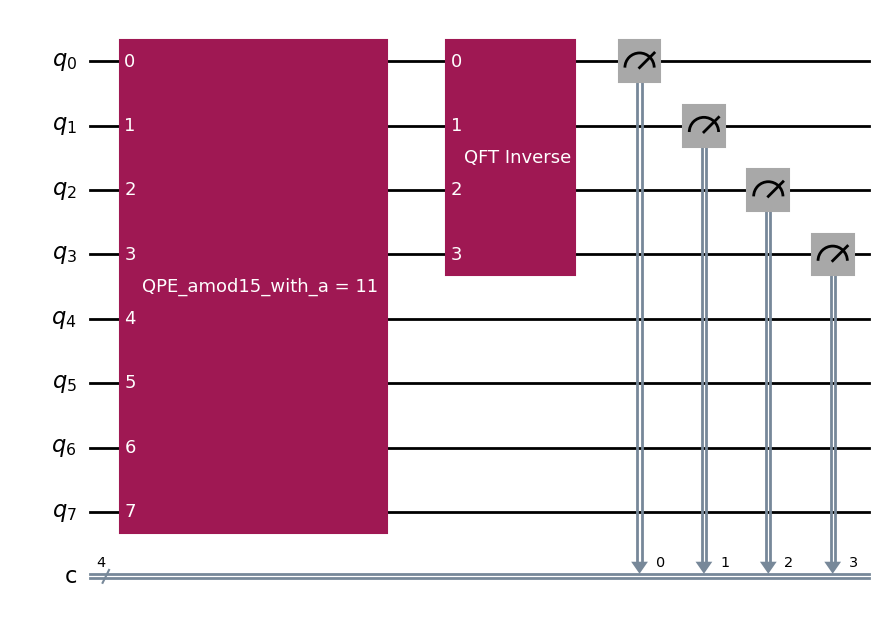

In [17]:
# Number to factor (N = 15)
N = 15

# Choose a random number 'a' such that 1 < a < N and gcd(a, N) = 1
a = 11 # You can change this value to test other numbers

# Create the QPE gate for the chosen 'a'
qpe_amod15_gate = qpe_amod15(a).to_gate()
qft_inv_gate = qft_inv(4).to_gate()

# Create the main circuit to use the QPE gate
main_circuit = QuantumCircuit(4 + 4, 4)
main_circuit.append(qpe_amod15_gate, range(4 + 4))
main_circuit.append(qft_inv_gate, range(4))
main_circuit.measure(range(4), range(4))

# Run the quantum period-finding part
simulator = Aer.get_backend('qasm_simulator')
qc_transpiled = transpile(main_circuit, backend=simulator)
result = simulator.run(qc_transpiled, shots=8192).result()
counts = result.get_counts()

# Classical post-processing to find the period (r)
for phase, frequency in counts.items():
    decimal_phase = int(phase, 2) / (2**4)
    frac = Fraction(decimal_phase).limit_denominator(N)
    r = frac.denominator
    if r % 2 == 0:
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        if guesses[0] != 1 and guesses[0] != N:
            print(f"Non-trivial factors are: {guesses}")
            break
        if guesses[1] != 1 and guesses[1] != N:
            print(f"Non-trivial factors are: {guesses}")
            break
else:
    print("No suitable 'r' found. Try a different 'a'.")

# Visualize the main circuit
main_circuit.draw('mpl')


Boom, we have factors of 15 as 3 and 5.

### Let's try a bigger number.

Nice, now let's try a bigger number. This time $N = 143$ and $a = 131$

Step 1: Implement Inverse Quantum Fourier Transform 

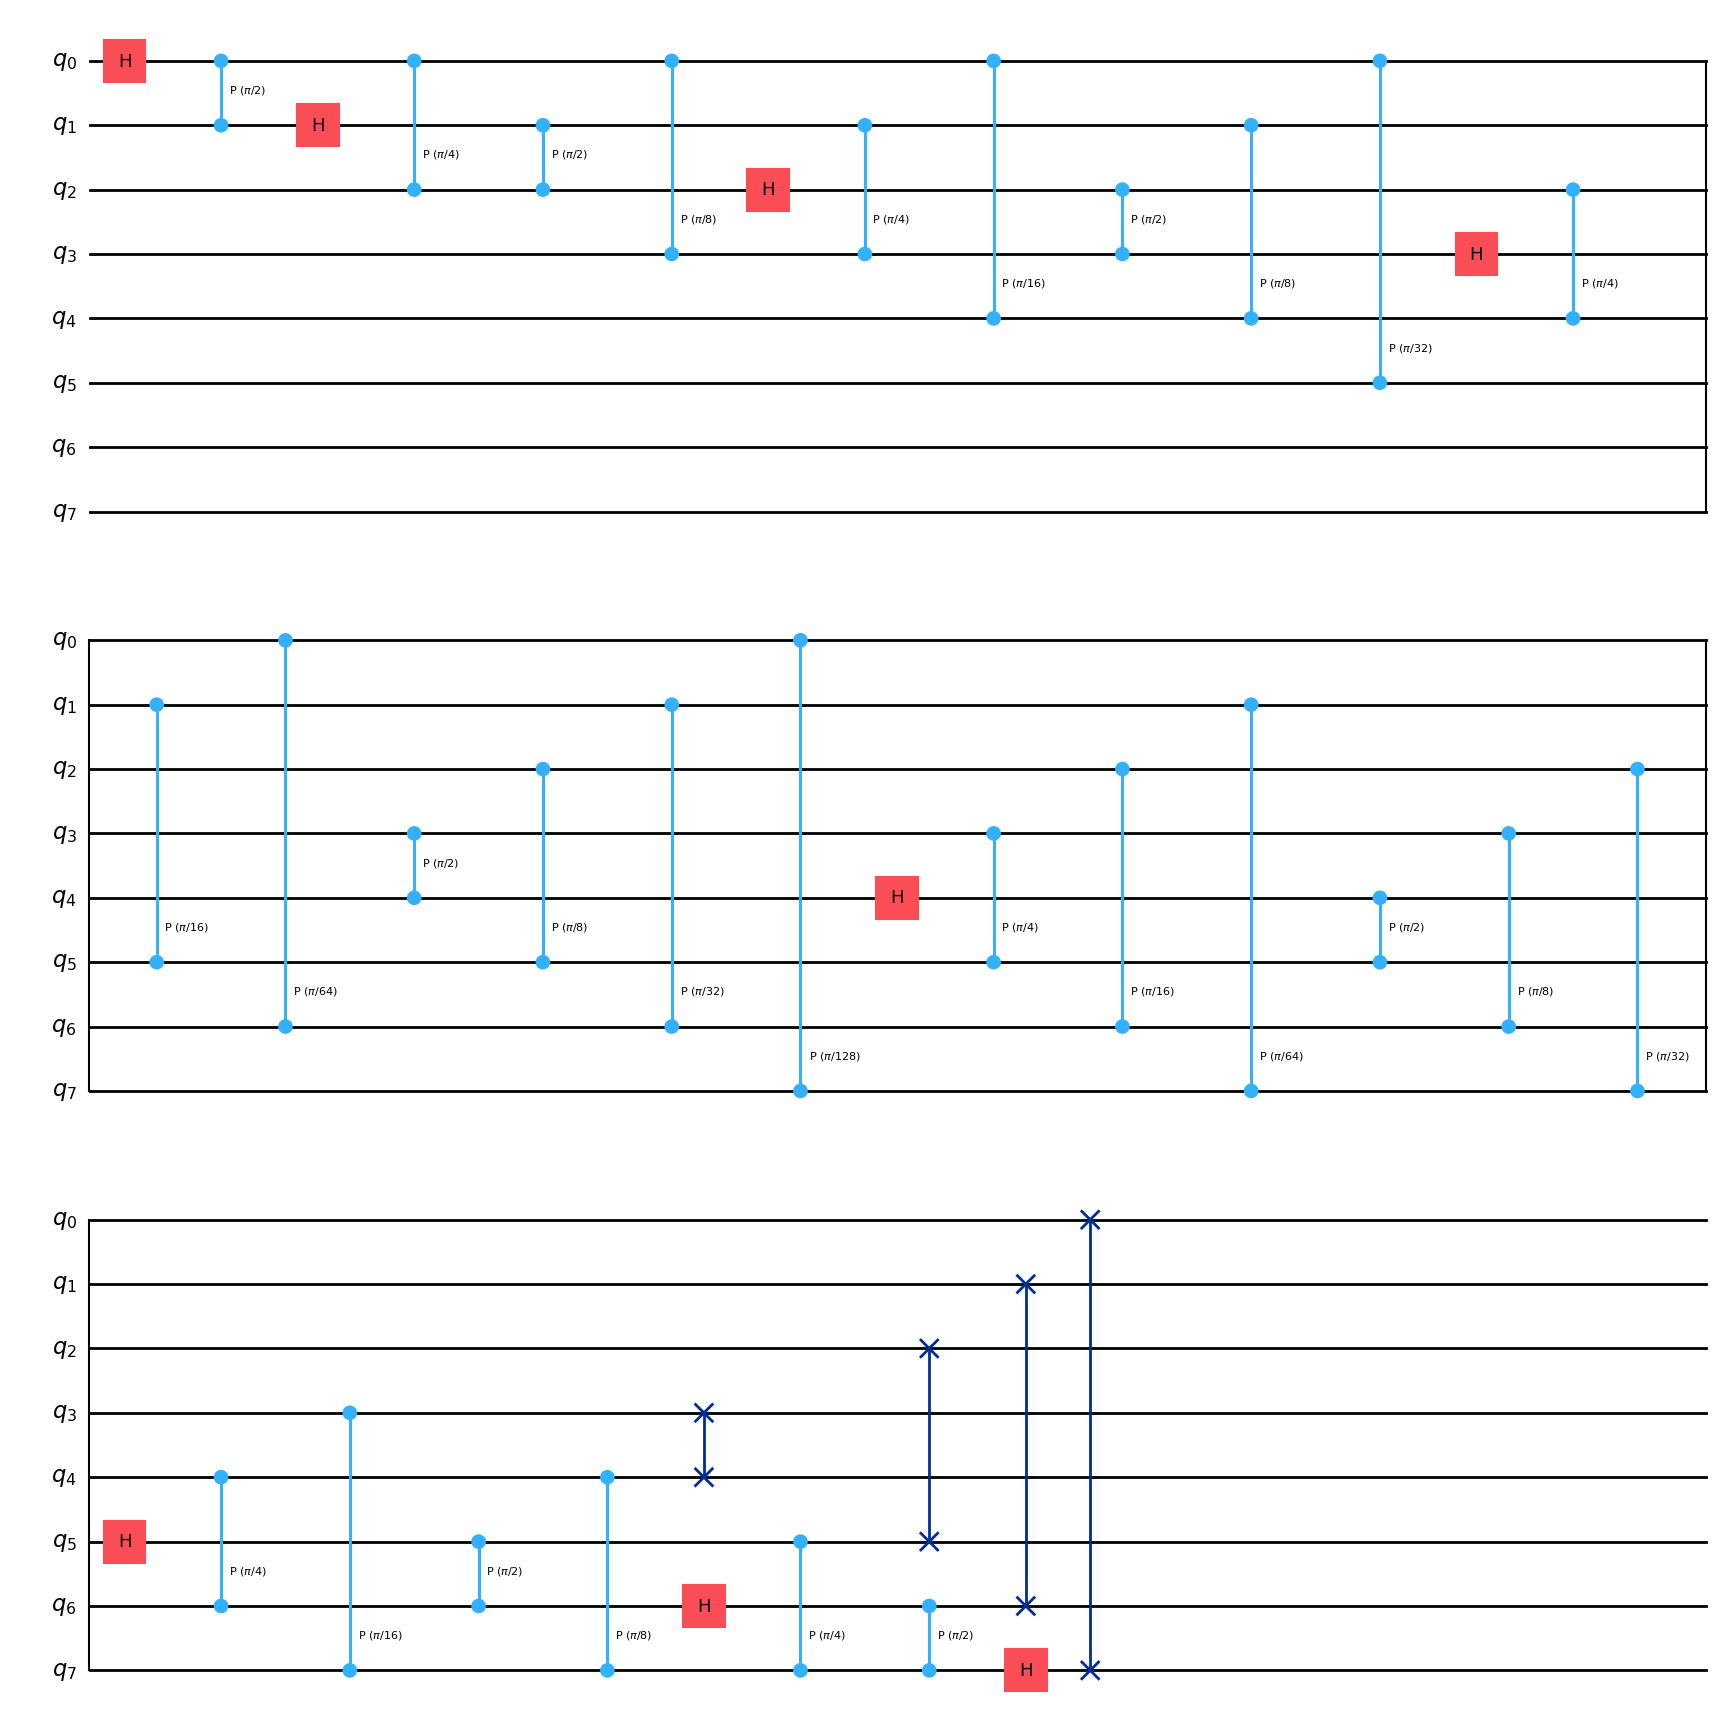

In [18]:
# Create an inverse QFT circuit for 8 qubits (use the same function as above)
qft_inv_circuit_143 = qft_inv(8)
qft_inv_circuit_143.draw('mpl')

Step 2: Now, I will create a QPE for $N = 143$

In [19]:
# Function to create QPE circuit as a gate for a specific 'a' without classical bits
def qpe_amod143(a):
    n_count = 8  # Increasing the number of qubits for the counting register due to larger N
    amod143 = QuantumCircuit(n_count + 8)

    # Apply Hadamard gates to the counting register
    for q in range(n_count):
        amod143.h(q)

    # Initialize the second register with a |1> state
    amod143.x(3 + n_count)

    # Apply controlled unitary operations
    for pow in range(n_count):
        for _ in range(2**pow):
            amod143.cp(a * np.pi / (2**pow), pow, 3 + n_count)

    amod143.name = f"QPE_amod143_with_a = {a}"
    return amod143

# Create a QPE circuit for visualization
qpe_circuit = qpe_amod143(4)

#  this is a huge circuit, but if you still want to see it, feel free to uncomment this code
# qpe_circuit.draw('mpl')  

Step 3: Mix and match everything.

Non-trivial factors are: [13, 11]


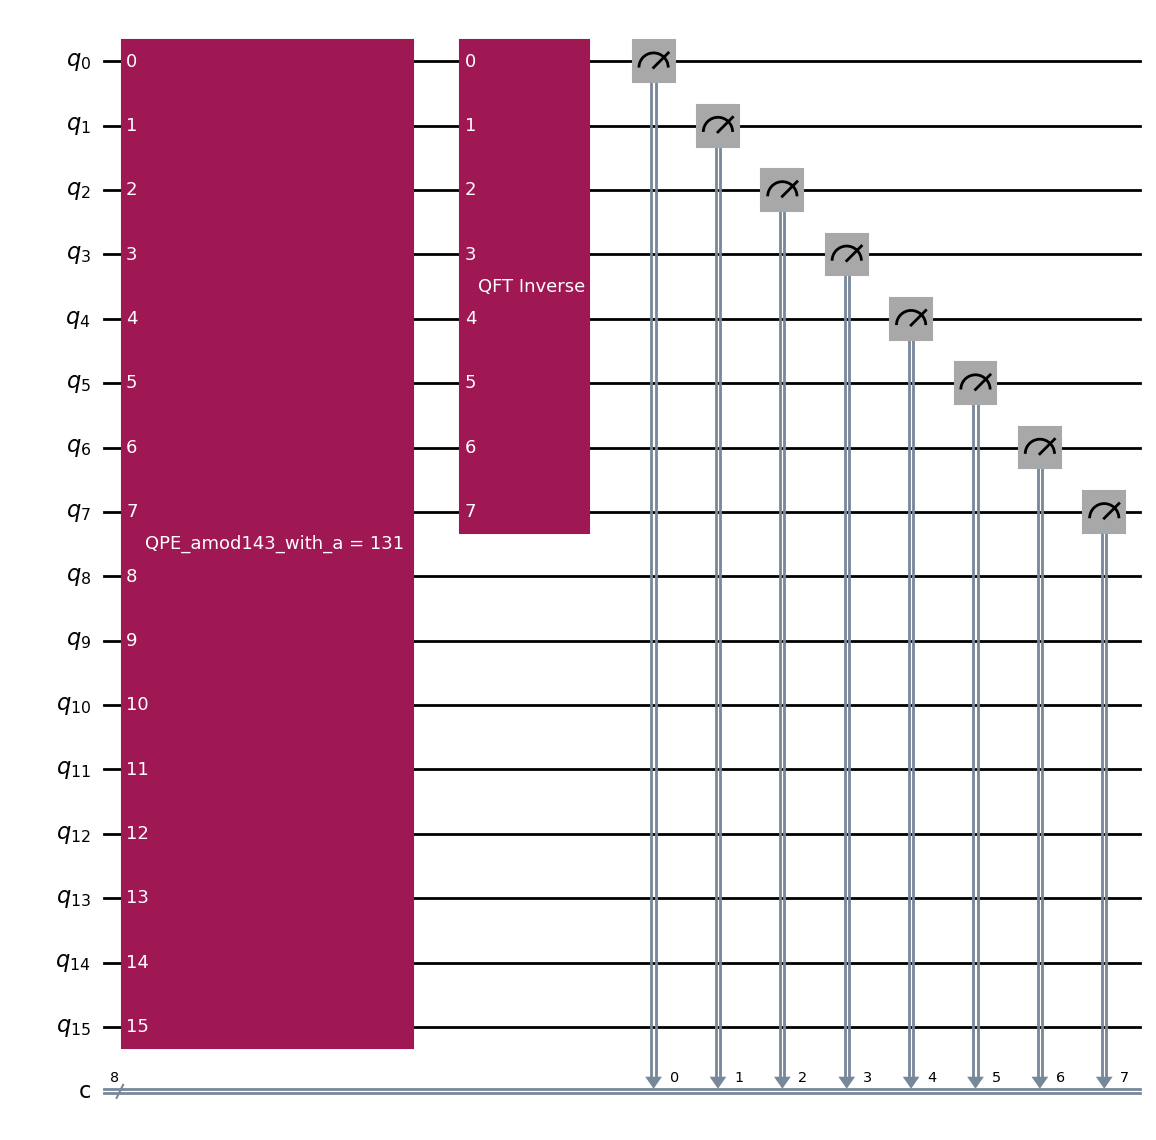

In [20]:
# Number to factor (N = 143)
N = 143

# Choose a random number 'a' such that 1 < a < N and gcd(a, N) = 1
a = 131  # You can change this value to test other numbers

# Create the QPE gate for the chosen 'a'
qpe_amod143_gate = qpe_amod143(a).to_gate()
qft_inv_gate = qft_inv(8).to_gate()

# Create the main circuit to use the QPE gate
main_circuit = QuantumCircuit(8 + 8, 8)
main_circuit.append(qpe_amod143_gate, range(8 + 8))
main_circuit.append(qft_inv_gate, range(8))
main_circuit.measure(range(8), range(8))

# Run the quantum period-finding part
simulator = Aer.get_backend('qasm_simulator')
qc_transpiled = transpile(main_circuit, backend=simulator)
result = simulator.run(qc_transpiled, shots=8192).result()
counts = result.get_counts()

# Classical post-processing to find the period (r)
for phase, frequency in counts.items():
    decimal_phase = int(phase, 2) / (2**8)
    frac = Fraction(decimal_phase).limit_denominator(N)
    r = frac.denominator
    if r % 2 == 0:
        guesses = [gcd(a**(r//2) - 1, N), gcd(a**(r//2) + 1, N)]
        if guesses[0] != 1 and guesses[0] != N:
            print(f"Non-trivial factors are: {guesses}")
            break
        if guesses[1] != 1 and guesses[1] != N:
            print(f"Non-trivial factors are: {guesses}")
            break
else:
    print("No suitable 'r' found. Try a different 'a'.")

# Visualize the main circuit
main_circuit.draw('mpl')


Finally, we have factors as 13 and 11.


##### Congratulations! we have successfully implemented, Quantum Fourier Transform, Quantum Phase Estimation, and Shor's Algorithm.